# Project: Investigating No-show Appointments Medical Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we invetsigate the No-show appointment data, downloaded from [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments). It collects 100k Medical Appointments from Brazil, answering the main question on whether a patient will show up or not for their scheduled appointment.  We investigate different reasons to doscover which affect whether a patient will sure up by answering the following questions:

1. Which gender is likely to show up for an appointment?
2. Does the a disease influence whether a patient will show up or not, for their appointment?
3. Does sponsering a patient influence them to show up for an appointment?
4. Does reminding a patient about their appointment through sms, influence them showing up for an appointment?
5. Does alcoholism influence a patient showing up for an appointment?
6. Which of the factors are important in predicting whether a patient will show up for their appointment?

In [1]:
import datetime
import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#functions of repetitive tasks
def plot_pie(col, labels, title):
    #proportion of patients that show up for an appointment vs those that do not show up
    df[col].value_counts().plot(kind='pie', autopct = '%0.0f%%', labels=labels)
    plt.title(title)
    plt.ylabel('')
    plt.show()

def plot_bar(hue, title, labels):
    plt.figure(figsize=(6,4))
    ax = sns.countplot(x='no_show', hue=hue, data=df)
    plt.title(title)
    plt.legend(labels=labels)
    plt.xticks([0,1],['did not show','showed up'])
    plt.show()
    

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
#load the data
df = pd.read_csv('KaggleV2-May-2016.csv')

#sample the data
df.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
67722,6.628983e+11,5429774,F,2016-03-04T08:00:51Z,2016-05-18T00:00:00Z,67,JARDIM CAMBURI,0,0,0,0,0,0,Yes
88444,9.137554e+14,5688280,F,2016-05-12T07:13:20Z,2016-06-07T00:00:00Z,28,BONFIM,0,0,0,0,0,1,No
93215,1.283669e+14,5690713,F,2016-05-12T10:31:50Z,2016-06-06T00:00:00Z,80,ILHA DE SANTA MARIA,0,0,0,0,0,0,Yes
24712,8.498826e+13,5653813,F,2016-05-03T13:22:10Z,2016-05-17T00:00:00Z,26,REDENÇÃO,0,0,0,0,0,0,No
25976,5.698617e+12,5654728,M,2016-05-03T15:10:04Z,2016-05-03T00:00:00Z,47,BELA VISTA,0,0,0,0,0,0,No
69588,2.136729e+14,5643784,F,2016-05-02T07:53:31Z,2016-05-02T00:00:00Z,2,SÃO CRISTÓVÃO,0,0,0,0,0,0,No
105331,7.316270e+13,5764789,M,2016-06-02T10:55:47Z,2016-06-02T00:00:00Z,1,SANTO ANTÔNIO,0,0,0,0,0,0,No
36098,7.591815e+13,5715303,M,2016-05-18T14:04:32Z,2016-05-18T00:00:00Z,50,TABUAZEIRO,0,1,0,1,0,0,No
40470,4.221193e+13,5719899,F,2016-05-19T12:42:57Z,2016-05-19T00:00:00Z,20,SANTA MARTHA,0,0,0,0,0,0,No
96027,6.838621e+13,5714918,F,2016-05-18T13:23:25Z,2016-06-03T00:00:00Z,6,SANTOS DUMONT,1,0,0,0,0,1,No


In [4]:
print(f'The data set has {df.shape[0]} rows and {df.shape[1]} columns')

The data set has 110527 rows and 14 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> The variable types seems to be appropriate for most columns, however the PatientID, ScheduledDay and AppointmentDay seemed to be miss represented, because an ID is usually a int not a float and the Days should be date. From the info, the are no missing values.

In [6]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> Majority of the variables are categorical, while PatientID, Appointment ID, ScheduledDay, and age are clearly not. AppointmentDay seems to occur mostly on the same days, as there are 27 unique Appointment days for 110527 records. Appointment ID is unique.

### Investigating with visuals

The important numeric variable is Age, thus the interpretations will focus more on age

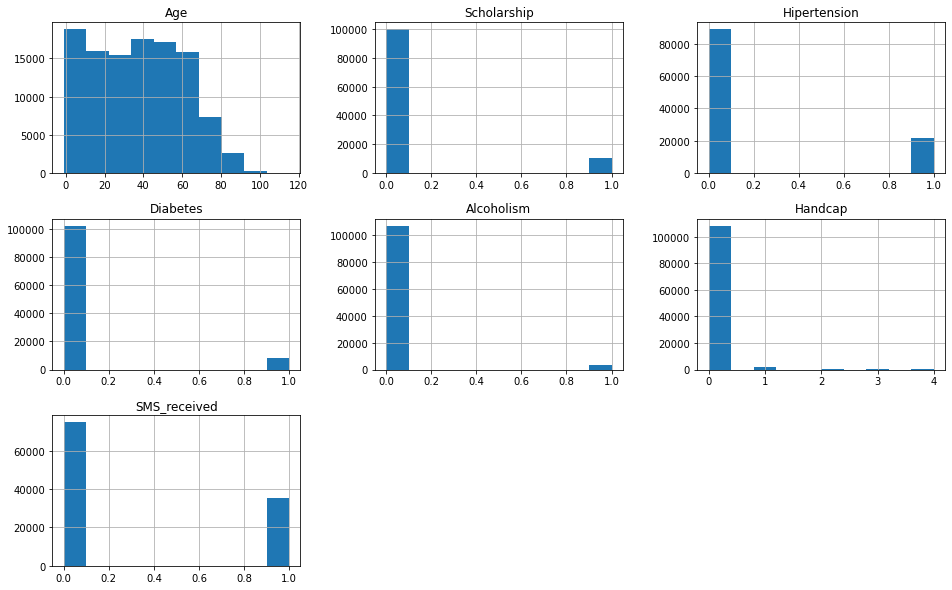

In [7]:
df.hist(column=['Gender','Age', 'Neighbourhood','Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
                'SMS_received'],figsize=(16,10));

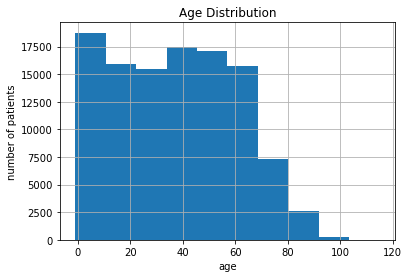

In [8]:
df['Age'].hist()
plt.title('Age Distribution');
plt.xlabel('age')
plt.ylabel('number of patients')
plt.show()

> The age is skewed to the right, and majority of people are between the ages of 0 - 70.

In [9]:
df.describe(include = 'all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


> The minimum age is -1, which is suspicious as age cannot be negative, the average age is 37, and the median age is 37. The maximum age is 115. Most patients are females, and the neighbourhood with most appointments is Jardim Camburi. Most patients show up for their appointments

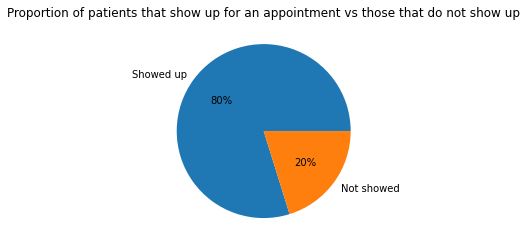

In [10]:
plot_pie(col='No-show',labels=['Showed up', 'Not showed'], 
         title='Proportion of patients that show up for an appointment vs those that do not show up')

> 80\% of patients show up for their appointments

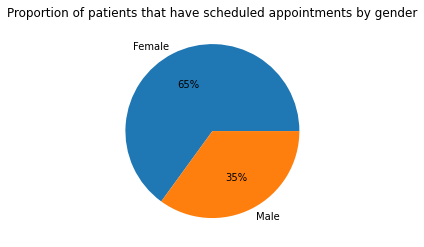

In [11]:
plot_pie(col='Gender', labels=['Female', 'Male'], 
         title='Proportion of patients that have scheduled appointments by gender')

> There are more female patients than male, 65\% female to 35\% males

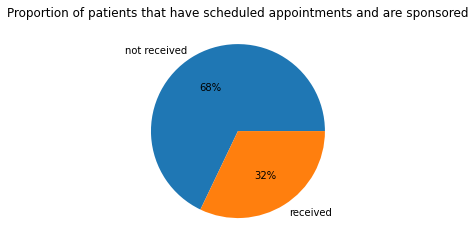

In [12]:
plot_pie(col='SMS_received', labels=['not received', 'received'], 
         title='Proportion of patients that have scheduled appointments and are sponsored')

68\% of patients do not recieve an sms

### Data Cleaning

> For data cleaning, we will convert days to dates, and drop columns that we do not deem important for our analysis

In [13]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'],infer_datetime_format=True)
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'],infer_datetime_format=True)

> We have successfully converted all the data types to the appropriate ones, we will then drop the Id columns as they are not important in understanding any insights from the appointment data.

In [14]:
df.drop(columns=['PatientId', 'AppointmentID'], axis=1, inplace=True)

> To be able to perform some variables with the No-show feature we will convert it to an integer

In [15]:
map_vals = {'No':1, 'Yes':0}
df['No-show'] = df['No-show'].map(map_vals)

In [16]:
#rename columns
df.rename(columns={'No-show':'no_show'}, inplace=True)

#make all column names small caps for ease of access 
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

In [17]:
#skip all columns that have a value that is less that 0, as it is inaccurate
df=df[df['age']>=0]

In [18]:
#confirm age exclusion
df.age.min()

0

In [19]:
df.head() #confirm changes

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [20]:
print(f'The data set has {df.shape[0]} rows and {df.shape[1]} columns')

The data set has 110526 rows and 12 columns


<a id='eda'></a>
## Exploratory Data Analysis


### Which gender is likely to not show up for their appointment?

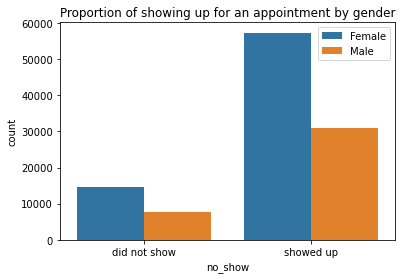

In [21]:
plot_bar(hue='gender', title='Proportion of showing up for an appointment by gender', labels=['Female', 'Male'])

> From the bar graph it seems like both females and males commit as much to their appointment, we have established in the wrandling stage that there are more females than men, hence getting a clear answe of who is likely to show up may require more investigation.

In [22]:
#counting values for each gender
count_gender = df.gender.value_counts()
count_gender

F    71839
M    38687
Name: gender, dtype: int64

In [23]:
#counting females and males that showed up
female_show = df[(df['gender'] == 'F')&(df['no_show']==1)].count()[0] #get any value that signifies showing up
male_show = df[(df['gender']=='M')&(df['no_show']==1)].count()[0]

#percentage males and females that showed up
print(f'Female: {(female_show/count_gender[0])*100:.0f}% \nMale: {(male_show/count_gender[1])*100:.0f}%')


Female: 80% 
Male: 80%


> With the above percentages we confirm that both male and female are likely to show up for the appointment, does gender does not influence a patient showing up for an appointment

### Does reminding a patient about their appointment through sms, influence them showing up for an appointment?

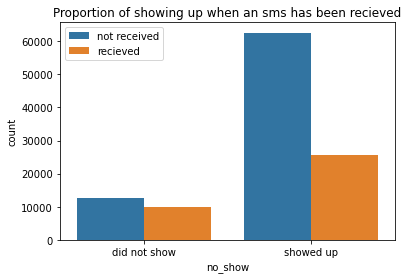

In [24]:
plot_bar(hue='sms_received', title='Proportion of showing up when an sms has been recieved',
         labels=['not received', 'recieved'])

> From the bar graph, it is likely that people that do not receive sms's are likely to show up

In [25]:
sms_recieved = df.sms_received.value_counts()
sms_recieved

0    75044
1    35482
Name: sms_received, dtype: int64

In [26]:
#counting show up when sms sent and not sent
sms_received = df[(df['sms_received'] == 1)&(df['no_show']==1)].count()[0] #get any value that signifies showing up
no_sms_received = df[(df['sms_received']==0)&(df['no_show']==1)].count()[0]

#percentage
print(f'SMS recieved show up: {(sms_received/sms_recieved[1])*100:.0f}% \nSMS not received show up: {(no_sms_received/sms_recieved[0])*100:.0f}%')


SMS recieved show up: 72% 
SMS not received show up: 83%


### Does giving a patient scholarship influence their showing up for an appointment?

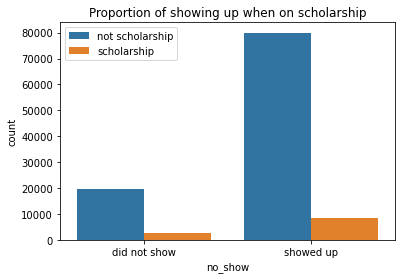

In [27]:
plot_bar(hue='scholarship', title='Proportion of showing up when on scholarship',
         labels=['not scholarship', 'scholarship'])

> People without schorlaship are likely to show. We do the propositions below to clarify this relationship

In [28]:
sponsered_count = df.scholarship.value_counts()
sponsered_count

0    99665
1    10861
Name: scholarship, dtype: int64

In [29]:
#counting when on sholarship
sponsered = df[(df['scholarship'] == 1)&(df['no_show']==1)].count()[0] #get any value that signifies showing up
not_sponsered = df[(df['scholarship']==0)&(df['no_show']==1)].count()[0]

#percentage males and females that showed up
print(f"""Scholarship: {(sponsered/sponsered_count[1])*100:.0f}%
No scholarship: {(not_sponsered/sponsered_count[0])*100:.0f}%""")


Scholarship: 76%
No scholarship: 80%


> The percentages confirm that 80\% of people without schorlaship are likely to show up compared to 76% without

### Does the a disease influence whether a patient will show up or not, for their appointment?

#### Hipertension

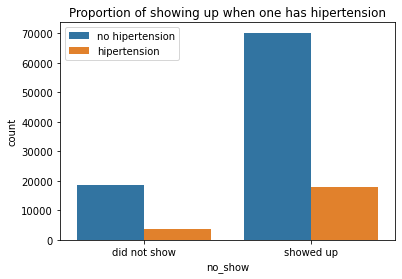

In [30]:
plot_bar(hue='hipertension', title='Proportion of showing up when one has hipertension',
         labels=['no hipertension', 'hipertension'])

In [31]:
hipertension_count = df.hipertension.value_counts()
hipertension_count

0    88725
1    21801
Name: hipertension, dtype: int64

In [32]:
#counting show up when sms sent and not sent
hipertension = df[(df['hipertension'] == 1)&(df['no_show']==1)].count()[0] #get any value that signifies showing up
not_hipertension = df[(df['hipertension']==0)&(df['no_show']==1)].count()[0]

#percentage males and females that showed up
print(f"""Hipertension: {(hipertension/hipertension_count[1])*100:.0f}%
No ipertension: {(not_hipertension/hipertension_count[0])*100:.0f}%""")


Hipertension: 83%
No ipertension: 79%


#### Diabetes

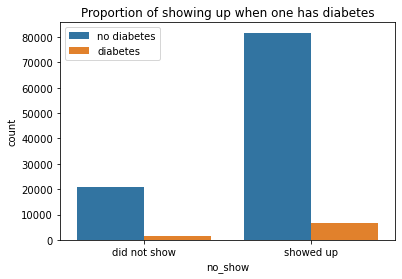

In [33]:
plot_bar(hue='diabetes', title='Proportion of showing up when one has diabetes',
         labels=['no diabetes', 'diabetes'])

In [34]:
diabetes_count = df.diabetes.value_counts()
diabetes_count

0    102583
1      7943
Name: diabetes, dtype: int64

In [35]:
#counting show up when one has diabetes
diabetes = df[(df['diabetes'] == 1)&(df['no_show']==1)].count()[0] #get any value that signifies showing up
not_diabetes = df[(df['diabetes']==0)&(df['no_show']==1)].count()[0]

#percentage of those with diabetes and those without diabetes 
print(f"""Diabetic: {(diabetes/diabetes_count[1])*100:.0f}%
Non diabetic: {(not_diabetes/diabetes_count[0])*100:.0f}%""")


Diabetic: 82%
Non diabetic: 80%


### Does alcoholism influence one showing up?

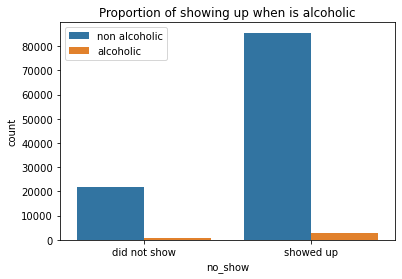

In [36]:
plot_bar(hue='alcoholism', title='Proportion of showing up when is alcoholic',
         labels=['non alcoholic', 'alcoholic'])

In [37]:
alcoholism_count = df.alcoholism.value_counts()
alcoholism_count

0    107166
1      3360
Name: alcoholism, dtype: int64

In [38]:
#counting show up when one they are alcoholic
alcoholism = df[(df['alcoholism'] == 1)&(df['no_show']==1)].count()[0] #get any value that signifies showing up
not_alcoholism = df[(df['alcoholism']==0)&(df['no_show']==1)].count()[0]

#percentage of those with diabetes and those without diabetes 
print(f"""Alcoholic: {(alcoholism/alcoholism_count[1])*100:.0f}%
Non alcoholic: {(not_alcoholism/alcoholism_count[0])*100:.0f}%""")


Alcoholic: 80%
Non alcoholic: 80%


### Which features are most important in predicting that an individual will show up for their appointment?

In [39]:
df.corr()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,0.060327
scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,-0.029134
hipertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,0.035704
diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,0.015181
alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,0.000197
handcap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,0.006077
sms_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,-0.126428
no_show,0.060327,-0.029134,0.035704,0.015181,0.000197,0.006077,-0.126428,1.000000


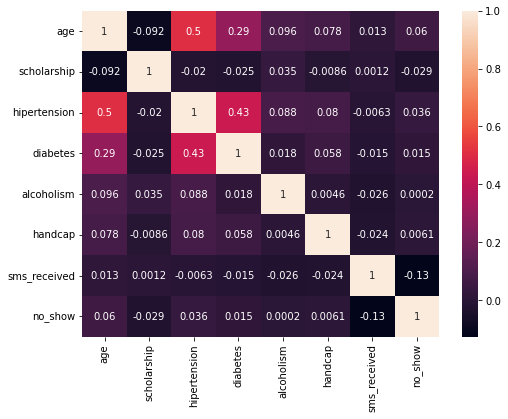

In [40]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(df.corr(), annot=True)

> There is no significant correlation between no_show and other features.

> There is a negative correlation between schorlaship and no show, and sms received and no showw, and the rest of the correlations between features and no show is positive.

> There si a positive correlation, highest (0.5) between age and hipertension, followed by 0.43 between hipertension and diabetes and finaly age and diabetes.

<a id='conclusions'></a>
## Conclusions

> In this project we investigated, explored and analysed the medical data with the aim of finding out what features may be used to determine whether a patient is likely to show-up or not show-up for a medical appointment. We found out that there is no significant relationship between the different features and the no_show feature, when using correlation.We determine that the data has more females than males, and 68\% of the patients do not recieve sms, and that 20% of the patients do not show up for their medical appointment.

> In regards to individual features, to answer the questions we have posed, we found out that alcoholism, gender does not have any different effect on whether one will sure up or not.

> Interestingly, we found out that people without schorlaship are likely to show-up comapared to those that have the schorlaship. Furthermore, people who did not recieve the schorlaship are likely to show up than those that did not show up.

> The mean and median age of patients is 37.

<a id='refernces'></a>
## References

1. [Pie plots](https://datascienceparichay.com/article/create-a-pie-chart-of-pandas-series-values/)
2. [Value Counts](https://stackoverflow.com/questions/35277075/python-pandas-counting-the-occurrences-of-a-specific-value)